In [212]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import multivariate_normal

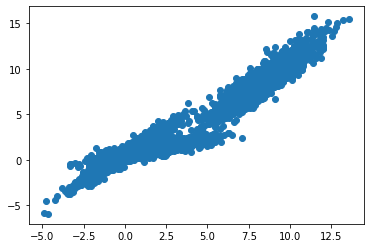

In [250]:
#Generating data
k = 3
X = np.array([[1,1]])
for i in range(k):
    mean = (i**3+random.random(),i**3+random.random())
    mat = np.random.rand(2,2)*2
    cov = mat@mat.T
    s = np.random.multivariate_normal(mean, cov, 1000)
    X = np.concatenate([X,s],axis=0)
    
plt.scatter(X[:, 0], X[:, 1])

In [251]:
N = X.shape[0]

#K-means
def intial_mu_k(k,X):
#     we will take return's row as intial
    np.random.seed(11)
    return np.random.randint(low = 0,high = X.shape[0],size = k)

def cost_function(mu,cluster_id,X):
    cost = 0
    for i in range(X.shape[0]):
        cost += np.sum((mu[cluster_id[i]]-X[i])**2)
    return cost

def K_means(k,X,max_iters = 100):
    mu_index = intial_mu_k(k,X)
    cluster_id = np.zeros(X.shape[0],dtype=int)
    print((cluster_id).shape)
    
    num_iters = 0
    error = 1000
    cost_values = []
    
    mu_data = np.zeros((k,2))
    for i in range(k):
#         note here 2--depends on dimension
        for j in range(2):
            mu_data[i][j] = X[mu_index[i]][j]
            
#     print("mu",mu_data)
    while (num_iters < max_iters) and (error > 0.0000001):
        
#   Updating Cluster_ids
        for i in range(X.shape[0]):
            distances = np.sum((mu_data-X[i])**2,axis = 1)
            min_dist = np.amin(distances)
            index = -1
            for j in range(mu_data.shape[0]):
                if distances[j] == min_dist:
                    index = j
                    break
            cluster_id[i] = index
            
#         print(cluster_id)

# Update mu's
        new_mu_data = np.zeros((k,2))
        cluster_size = np.zeros(k)
        for i in range(X.shape[0]):
            cluster_size[cluster_id[i]] = cluster_size[cluster_id[i]]+1
            new_mu_data[cluster_id[i]] = new_mu_data[cluster_id[i]]+X[i]
        
#         print("Cluster_size",cluster_size)
        for i in range(k):
            if cluster_size[i] == 0:
                cluster_size[i] = 1
                
            new_mu_data[i] = new_mu_data[i]/cluster_size[i]
        
        J = cost_function(mu_data,cluster_id,X)
        cost_values.append(J)
#         print(new_mu_data,mu_data)
        error = np.sum(np.abs(mu_data-new_mu_data))
        mu_data = new_mu_data
        num_iters += 1
        print("iteration",num_iters)
        print("error:",error)
        print("cost:",J)
        
    return mu_data,cluster_id,cost_values,num_iters

In [252]:
mu,cluster_id,cost,num_iters = K_means(k,X)

(3001,)
iteration 1
error: 9.129395001530945
cost: 97728.28100736359
iteration 2
error: 6.133102494093802
cost: 26311.69168533065
iteration 3
error: 0.9999499684837934
cost: 11556.707088815667
iteration 4
error: 0.2904295378248871
cost: 11274.865235607991
iteration 5
error: 0.11732043174222317
cost: 11251.514614528367
iteration 6
error: 0.07190548849567815
cost: 11246.948213296426
iteration 7
error: 0.07656165807845626
cost: 11244.6130371406
iteration 8
error: 0.029307527675730798
cost: 11242.673534293494
iteration 9
error: 0.03904771570338479
cost: 11242.169371543554
iteration 10
error: 0.03254967702183729
cost: 11241.446778383217
iteration 11
error: 0.014601127153935044
cost: 11241.09807774706
iteration 12
error: 0.00487773048088657
cost: 11241.024111441646
iteration 13
error: 0.0
cost: 11241.017338579553


Text(0.5, 1.0, 'Cost Function')

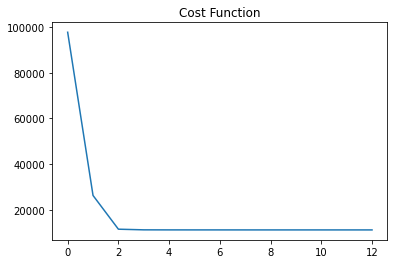

In [253]:
#Cost graph
x = []
for i in range(num_iters):
    x.append(i)
plt.plot(x,cost)
plt.title("Cost Function")

In [254]:
# X-->N*D
# Z-->N*K

# for needed intialization needed N_k,mu_k,sigma_k,pi_k

def intiliase_for_GMM(mu,cluster_id,X,k):
    mu_k = []
    sigma_k = []
    pi_k = []
    clusters = []   
    cluster_size = np.zeros(k)
    Z = np.zeros((X.shape[0],k))

    # for sigma
    for i in range(k):
        mu_k.append(mu[i])
        clusters.append([])


    for i in range(X.shape[0]):
        cluster_size[cluster_id[i]] = cluster_size[cluster_id[i]]+1
        clusters[cluster_id[i]].append(X[i])

    # np.asarray(clusters[0])
    for i in range(k):
        A = np.asarray(clusters[i])
        sigma_k.append((A-mu_k[i]).T@(A-mu_k[i])/cluster_size[i])
        pi_k.append(cluster_size[i]/X.shape[0])
        
    return mu_k,sigma_k,pi_k,Z
    
# def add_log_each_point_cost(Z):
#     return np.max(Z) + np.log(np.sum(np.exp(Z-np.max(Z))))

# def log_likilihood(X,contribution,mu_k,sigma_k,k):
    
#     answer = 0
#     for i in range(X.shape[0]):
        
# #         temp = np.zeros(k)
#         for j in range(k):
# #             buffer = X[i]-mu_k[j]
# #             e_power = np.dot(buffer.T,np.dot(np.linalg.pinv(sigma_k[j]),buffer))
            
# #             Z[k] += np.log(contribution[j])
# #             Z[k] -= 1/2. *(X.shape[0]*np.log(2*np.pi) + np.log(np.linalg.det(sigma_k[j]))+ e_power)
#             temp = multivariate_normal.pdf(X[i],mu_k[j],sigma_k[j])
#             temp = contribution[j]*temp
#         answer += add_log_each_point_cost(Z)
#     return answer

def compute(X,pi_k,mu_k,sigma_k,k):
    temp = np.zeros((X.shape[0],k))
    for i in range(k):
        p = pi_k[i]
        liklihood = multivariate_normal.pdf(X,mu_k[i],sigma_k[i])
        temp[:,i] = p*liklihood
    
    return np.sum(np.log(np.sum(temp,axis = 1)))
    
def E_step(Z,mu_k,sigma_k,pi_k,X,k):
    for i in range(X.shape[0]):
        for j in range(k):
            Z[i,j] = pi_k[j]*multivariate_normal.pdf(X[i],mu_k[j],sigma_k[j])
    total_row_sum = Z.sum(axis=1)[:,np.newaxis]
    Z = Z/total_row_sum
    return Z


def M_step(X,Z,mu_k,sigma_k,pi_k,k):
    count_each_cluster = np.sum(Z,axis=0)
    N = X.shape[0]
    for i in range(k):
    # pi_k^
        pi_k[i] = count_each_cluster[i]/N
    # mu_k^
        soft_sum = 0
        for j in range(X.shape[0]):
            soft_sum += (Z[j,i]*X[j])
        mu_k[i] = soft_sum/count_each_cluster[i]
    # sigma_k^k
        soft_sum = np.zeros((X.shape[1],X.shape[1]))
        for j in range(X.shape[0]):
#             soft_sum += (Z[j,i]*((X[j]-mu_k[i]).T@(X[j]-mu_k[i])))
            soft_sum += (Z[j,i]* np.outer(X[j]-mu_k[i],X[j]-mu_k[i]))
        sigma_k[i] = soft_sum/count_each_cluster[i]
#         print(soft_sum)
    return mu_k,sigma_k,pi_k
    
def EM_main(X,mu,cluster_id,k,max_iters = 100):
    mu_k,sigma_k,pi_k,Z = intiliase_for_GMM(mu,cluster_id,X,k)
    ll = []
    
    old_ll = compute(X,pi_k,mu_k,sigma_k,k)
    ll.append(old_ll)
#     new_ll = 0.0
    num_iters = 0
    error = 10.0
    while (num_iters) < max_iters and error > 1:
        Z = E_step(Z,mu_k,sigma_k,pi_k,X,k)
        mu_k ,sigma_k,pi_k = M_step(X,Z,mu_k,sigma_k,pi_k,k)
        new_ll = compute(X,pi_k,mu_k,sigma_k,k)
        ll.append(new_ll)
        
#         print(type(old_ll),type(new_ll))
        error = np.abs(old_ll-new_ll)
        old_ll = new_ll
    
    return ll,mu_k,sigma_k,pi_k

In [255]:
l,mu_k,sigma_k,pi_k = EM_main(X,mu,cluster_id,k)

In [271]:
def plot_contours(X, mu_k, sigma_k,k,title):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(X[:, 0], X[:, 1], 'ko')

    delta = 0.025
#     k = mu_k.shape[0]
    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = mu_k[i]
        cov = sigma_k[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
#         print(z_grid)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])
        print(i)

#     plt.title(title)
    plt.tight_layout()

0
1
2


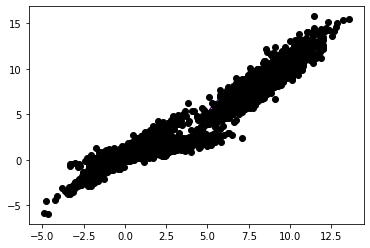

In [272]:
plot_contours(X,mu_k,sigma_k,k,"lol")

In [207]:
np.linalg.eigvals(sigma_k[3])

array([0.04586674, 0.00025194])

In [208]:
sigma_k[3]

array([[0.04320273, 0.0106968 ],
       [0.0106968 , 0.00291596]])